# Working with Image Data in PyTorch
PyData Los Angeles 2019 Tutorial

This notebook covers the basics of working with image data in PyTorch.  

### Installing torch and torchvision
If you haven't already, install pytorch with conda:

In [1]:
#!conda install pytorch -c pytorch

Also install torchvision with pip:

In [2]:
#!pip install torchvision

### Running this notebook in Google Colab
Alternatively, Google offers free, GPU-enabled, cloud-hosted notebooks with PyTorch installed by default. 

Use the following link to run this notebook in a Colab notebook:
https://colab.research.google.com/github/danieljbrooks/PyTorchTutorial/blob/master/1.%20Working%20with%20image%20data%20in%20PyTorch.ipynb

In [3]:
import torch
import torchvision

### Creating tensors
Torch tensors can be created in a number of ways

In [4]:
x = torch.zeros([3, 3])
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [5]:
y = torch.Tensor([1, 2, 3, 4])
print(y)

tensor([1., 2., 3., 4.])


### Numpy compatibility
Torch tensors can be converted to and from numpy arrays

In [6]:
import numpy

n = numpy.array([3, 2, 1])
print(n, type(n))

[3 2 1] <class 'numpy.ndarray'>


In [7]:
t = torch.from_numpy(n)
print(t)

tensor([3, 2, 1], dtype=torch.int32)


In [8]:
numpy_again = t.numpy()
print(numpy_again, type(numpy_again))

[3 2 1] <class 'numpy.ndarray'>


### Working with CUDA
Torch supports GPU acceleration with CUDA, when available.

In [9]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
    
input1 = torch.Tensor([1, 3, 5], device=device)
input2 = torch.Tensor([4, 5, 6]).to(device=device)
out = input1 + input2
print(out)
print(out.device) # This will say "CUDA:0 on CUDA devices"

tensor([ 5.,  8., 11.])
cpu


### Loading images
Images are loaded using python's image library (PIL).

In [10]:
from PIL import Image

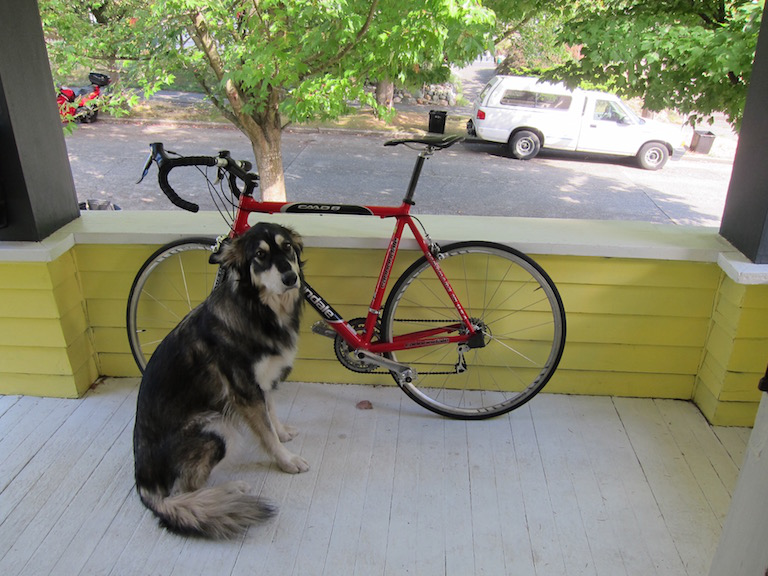

In [11]:
im = Image.open("./sample.jpg")
display(im)

Torchvision can convert this image into a torch tensor.

In [12]:
image_tensor = torchvision.transforms.ToTensor()(im)
print(image_tensor.shape)

torch.Size([3, 576, 768])


The standard image format includes a fourth dimension (for batch size).

In [13]:
image_tensor = image_tensor.unsqueeze(0)
print(image_tensor.shape)

torch.Size([1, 3, 576, 768])


That's it, this image is ready for inference!